In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#First we generate the piano roll from y_test_pred, that has been predicted by the model
arr = np.load('/content/drive/MyDrive/Model2.npy')
arr=np.squeeze(arr, axis=-2)
print(np.shape(arr))

(578322, 88)


In [ ]:
#converting boolean to binary matrix with entries 0 and 1
arr2 = np.empty((578322, 88), dtype = int)
X=arr 
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif X[i,j]==True:
            arr2[i,j]=int(1)

         
print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
!pip install midiutil

     |████████████████████████████████| 1.0 MB 9.5 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=7092f7c2270dfd0b3f1179fd70b48f6420b925ace9cafc55c359b8a79fb3ec76
  Stored in directory: /root/.cache/pip/wheels/e3/97/cd/a677b61a76d575f373e2e10302f1d9106507fea6dd1320df03
Successfully built midiutil


In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if X[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [ ]:
#generate the MIDI file for y_test_pred
with open("output_final.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
!pip install pretty_midi

     |████████████████████████████████| 5.6 MB 7.0 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=5aff435bdf67c633f9d1891cba78f7582e773d95517d452df725db4ac0c07c58
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built pretty-midi


In [ ]:
import pretty_midi
import pandas as pd
path = "output_final.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.004687     13       100     Output
1        0.000000    0.000521     41       100     Output
2        0.000000    0.000521     53       100     Output
3        0.000521    0.001042     41       100     Output
4        0.000521    0.001042     53       100     Output
...           ...         ...    ...       ...        ...
52652  124.987500  124.992188     23       100     Output
52653  124.987500  124.992188     30       100     Output
52654  124.987500  124.992188     35       100     Output
52655  124.987500  124.992188     39       100     Output
52656  124.987500  124.992188     61       100     Output

[52657 rows x 5 columns]


From Model


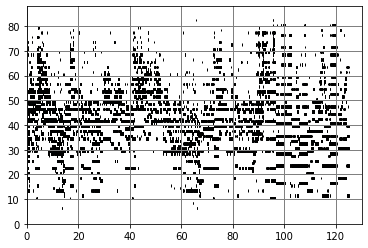

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<52657) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('From Model')
plt.show()

In [ ]:
#Now we generate the piano roll from y_test to check if it matches with the prediction
arr3 = np.load('/content/drive/MyDrive/CQT files/Ytestfinal.npy')
arr3=np.squeeze(arr3, axis=-2)
print(np.shape(arr3))

(15219, 38, 88)


In [ ]:
#again backtracking to convert 3D array to 2D
X2=[]
i=0
for i in range(15219):
  if i==0:
    X2=arr3[0]
  else:
    X2=np.concatenate((X2, arr3[i]), axis=0)
print(X2.shape)

(578322, 88)


In [ ]:
arr4 = np.empty((578322, 88), dtype = int) 
for i in range(X2.shape[0]):
    for j in range(X.shape[1]):
        if X2[i,j]==False:
            arr4[i,j]=int(0)
            int(arr4[i,j])
        elif X2[i,j]==True:
            arr4[i,j]=int(1)

         
print(arr4)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(np.count_nonzero(arr4))

In [ ]:
mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(10000):   
    time=time + i*delta
    for j in range(arr4.shape[1]):
        if X2[i][j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)


In [ ]:
with open("output_final_actual.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
path = "output_final_actual.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

            Start         End  Pitch  Velocity Instrument
0        0.000000    0.000521     41       100     Output
1        0.000521    0.001042     41       100     Output
2        0.001042    0.001563     41       100     Output
3        0.001563    0.002083     41       100     Output
4        0.002083    0.002604     41       100     Output
...           ...         ...    ...       ...        ...
53598  124.987500  124.992188     30       100     Output
53599  124.987500  124.992188     35       100     Output
53600  124.987500  124.992188     39       100     Output
53601  124.987500  124.992188     61       100     Output
53602  124.987500  124.992188     63       100     Output

[53603 rows x 5 columns]


Actual


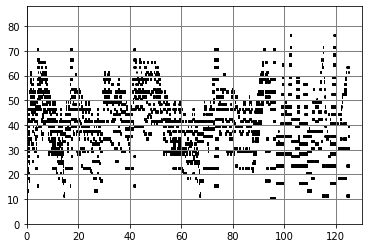

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<53602) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=1)
    ax.add_patch(rect)
    i+=1
  

plt.xlim([0, 130])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

print('Actual')
plt.show()